In [1]:
import os
import re
import h5py
import random
import numpy as np
import pandas as pd
import scipy.io
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [4]:
datadir = '../../datasets/NNN/'
dat = pd.read_pickle(os.path.join(datadir, ('face_roi_data.pkl')))
print(f'data with these rois: {list(dat['roi'].unique())}')

data with these rois: ['Unknown_19_F', 'MF1_9_F', 'MF1_8_F', 'AF3_18_F', 'MF1_7_F', 'Unknown_5_F', 'AMC3_28_F']


In [5]:
ROI = 'Unknown_19_F'

sig = dat[dat['p_value'] < 0.05]
df = sig[sig['roi'] == ROI]

if len(df) == 0:
    raise ValueError(f"No data for ROI {ROI}")
    
X = np.stack(df['img_psth'].to_numpy())   
X.shape

(261, 450, 1072)

In [6]:
img_sets = {'all images': np.arange(1000,1072), 
           'all faces': np.arange(1000,1024),
           'monkey faces':  np.concatenate([np.arange(1000,1006), np.arange(1009,1016)]),
           'human faces': np.concatenate([np.arange(1006,1009), np.arange(1016,1025)]),
           'all nonfaces': np.arange(1025,1072),
            'all objects': np.setdiff1d(np.arange(1000, 1072), np.concatenate([np.arange(1000,1024), np.arange(1025,1031), np.arange(1043,1049), np.arange(1051,1062)])),
           'monkey bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049)]),
            'animal bodies': np.concatenate([np.arange(1026,1031), np.arange(1043,1049), np.arange(1051,1062)]),
           }

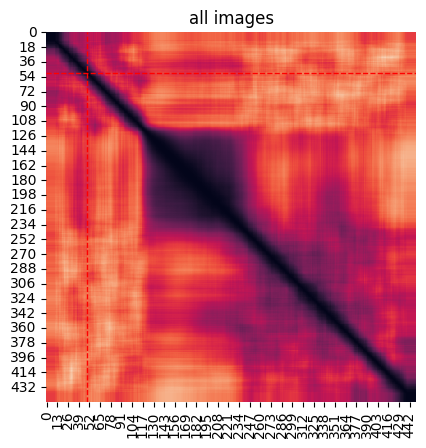

/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:771: FutureWarning: The `dissimilarity` parameter is deprecated and will be removed in 1.10. Use `metric` instead.
  warnings.warn(


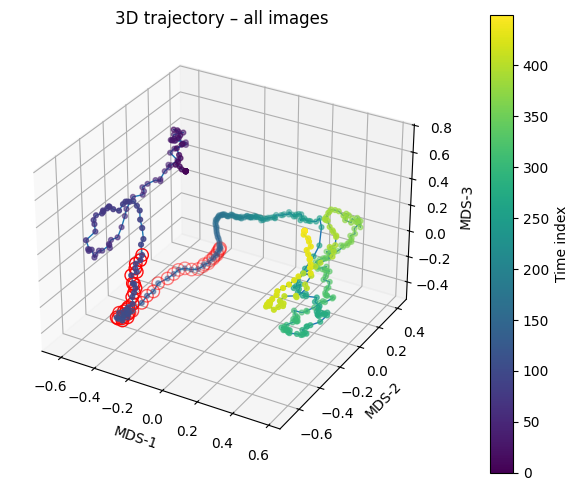

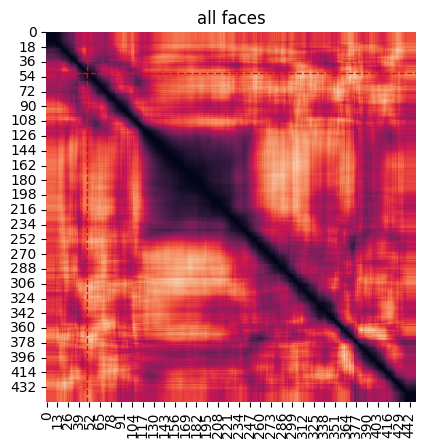

/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:771: FutureWarning: The `dissimilarity` parameter is deprecated and will be removed in 1.10. Use `metric` instead.
  warnings.warn(


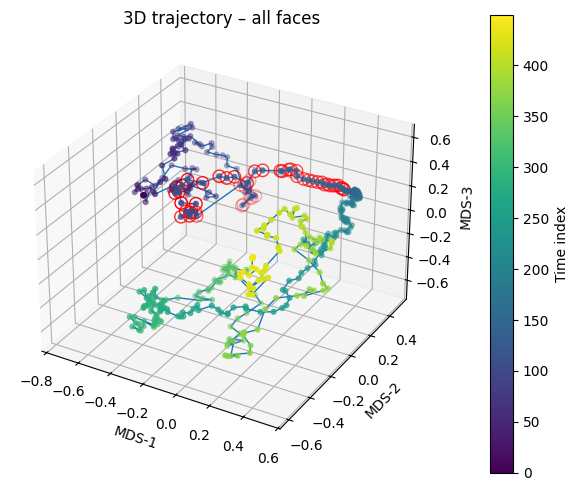

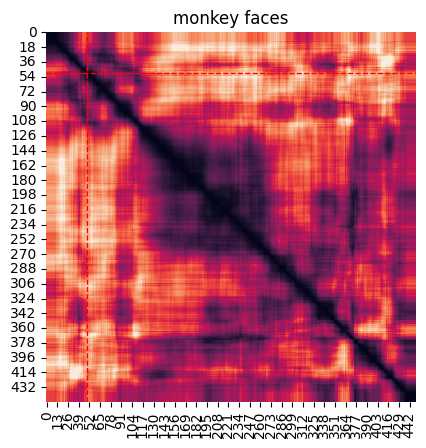

/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:771: FutureWarning: The `dissimilarity` parameter is deprecated and will be removed in 1.10. Use `metric` instead.
  warnings.warn(


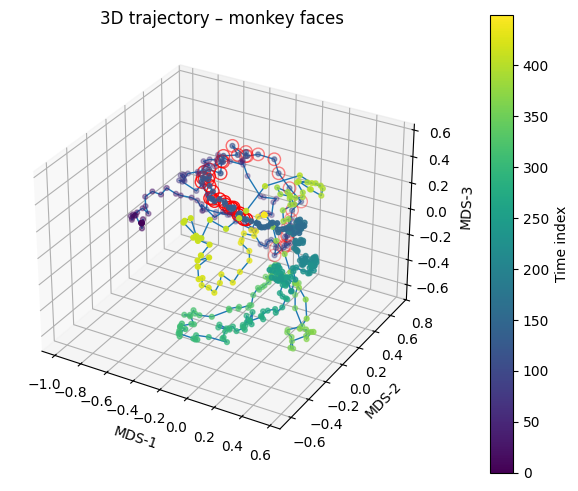

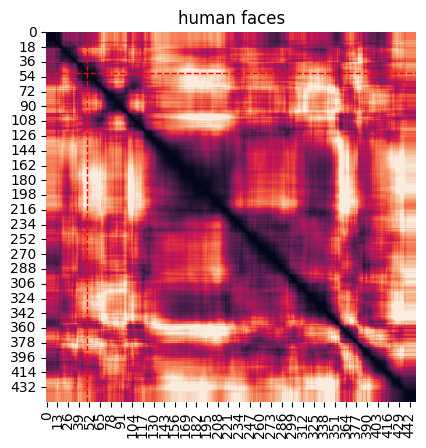

/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:771: FutureWarning: The `dissimilarity` parameter is deprecated and will be removed in 1.10. Use `metric` instead.
  warnings.warn(


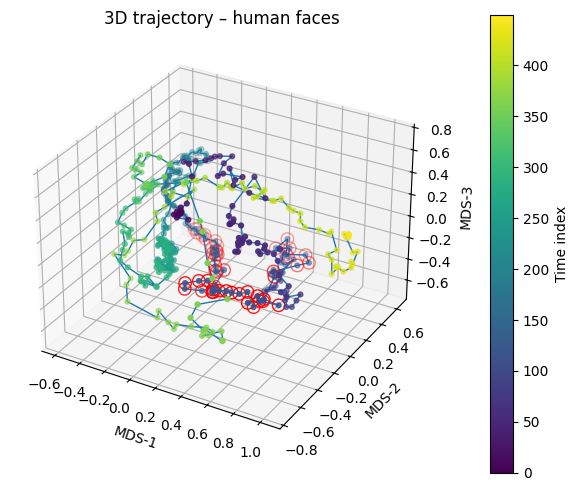

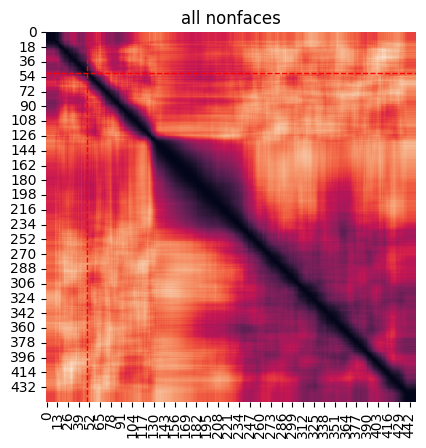

/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:771: FutureWarning: The `dissimilarity` parameter is deprecated and will be removed in 1.10. Use `metric` instead.
  warnings.warn(


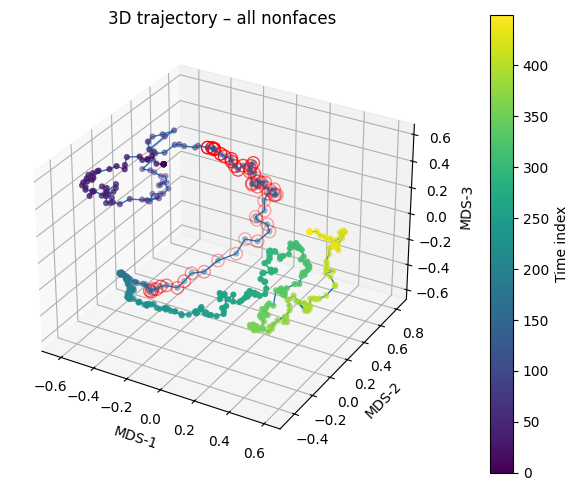

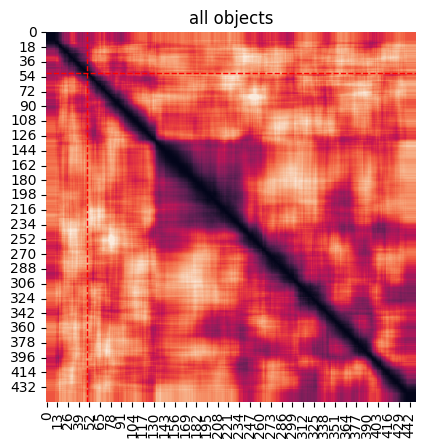

/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:771: FutureWarning: The `dissimilarity` parameter is deprecated and will be removed in 1.10. Use `metric` instead.
  warnings.warn(


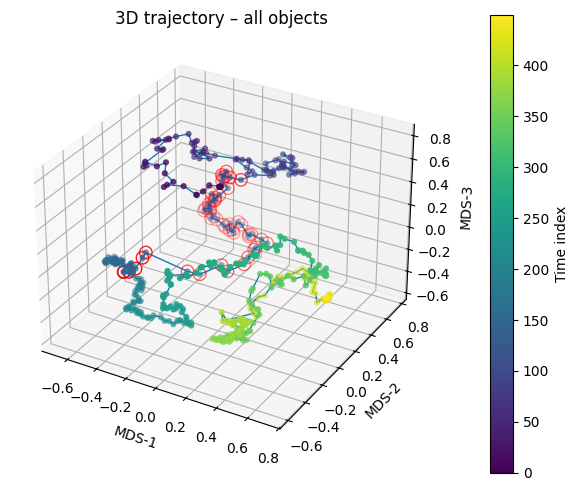

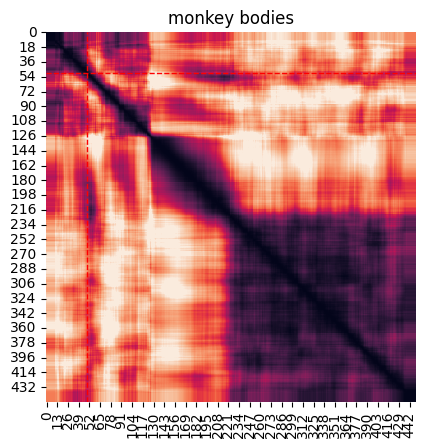

/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:771: FutureWarning: The `dissimilarity` parameter is deprecated and will be removed in 1.10. Use `metric` instead.
  warnings.warn(


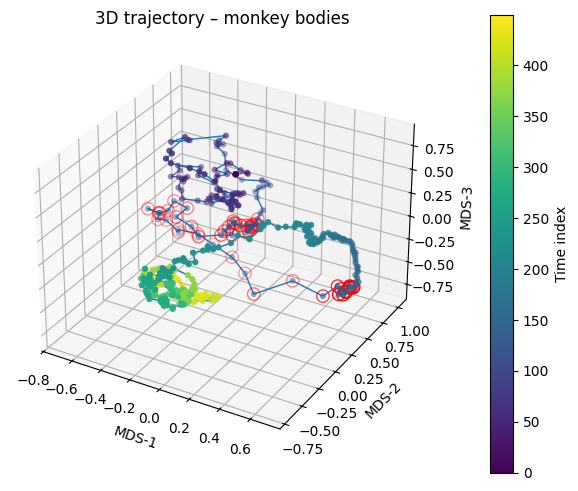

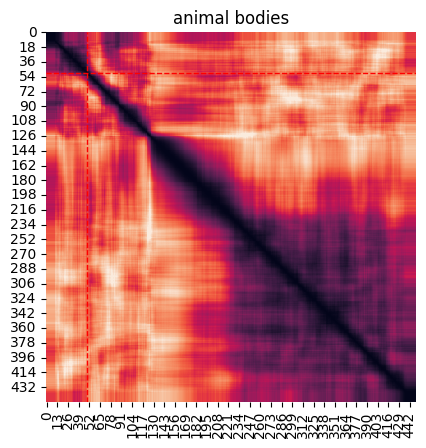

/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(
/Users/aim/Desktop/HVRD/workspace/manifold-dynamics/.venv/lib/python3.13/site-packages/sklearn/manifold/_mds.py:771: FutureWarning: The `dissimilarity` parameter is deprecated and will be removed in 1.10. Use `metric` instead.
  warnings.warn(


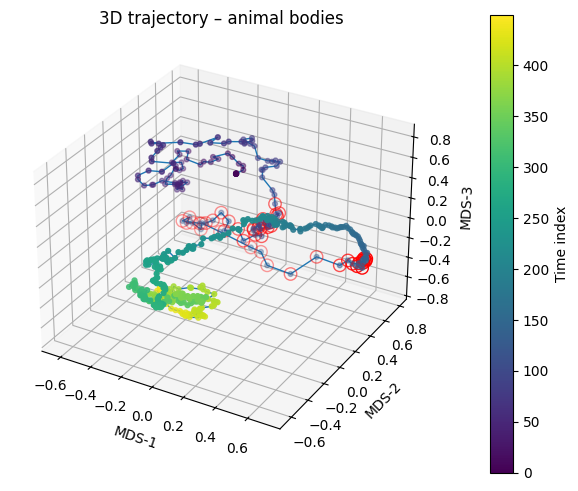

In [8]:
metric = 'correlation'

for k,v in img_sets.items():
    substacked = X[:, :, v]
    # average over units
    averaged = np.mean(substacked, axis=0)
    
    fig,ax = plt.subplots(1,1)

    # plot rdm
    rdm = squareform(pdist(averaged, metric=metric))
    sns.heatmap(rdm, cbar=False, square=True, vmax=1.5)
    ax.set_title(f'{k}')

    ax.axvline(x=50, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=50, color='red', linestyle='--', linewidth=1)
    plt.show()

    # Embed into 3D and plot trajectory
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=0)
    coords = mds.fit_transform(rdm)               # [time, 3]
    T = coords.shape[0]
    ts = np.arange(T)

    # 3D plot
    fig = plt.figure(figsize=(6,5))
    # ax = fig.add_subplot()
    ax = fig.add_subplot(111, projection='3d')

    # Draw trajectory line
    ax.plot(coords[:,0], coords[:,1], coords[:,2], 
            linewidth=1)

    # Scatter with time-coded colors
    sc = ax.scatter(coords[:,0], coords[:,1], coords[:,2],
                    c=ts, cmap='viridis', s=12)

    # Optional: highlight a particular time (e.g., 50)
    t_mark = np.arange(90, 140)
    if (t_mark < T).all:
        ax.scatter(coords[t_mark,0], coords[t_mark,1], coords[t_mark,2],
                   s=80, edgecolor='red', facecolor='none')

    ax.set_title(f"3D trajectory – {k}")
    ax.set_xlabel("MDS-1"); ax.set_ylabel("MDS-2"); ax.set_zlabel("MDS-3")
    cbar = plt.colorbar(sc, ax=ax, pad=0.1)
    cbar.set_label("Time index")

    plt.tight_layout()
    plt.show()